# Импортируем нужные библиотеки

In [676]:
import pandas as pd
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# Загружаем данные

In [677]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [678]:
train_df = pd.read_csv("/content/drive/MyDrive/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test.csv")

In [679]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [680]:
train_df["LoanApproved"].value_counts()


,count
LoanApproved,
1.0,5367
0.0,5120


классы +- сбалансированы

In [681]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

In [682]:
test_df["LoanApproved"].value_counts()

,count
LoanApproved,
1,2581
0,2419


# Займемся обработкой датасета

##Удалим все строчки где значение NaN больше 20

In [683]:
clean_train_df = train_df.dropna(thresh=train_df.shape[1] - 20).copy()

In [684]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           10487 no

## Заменим в CreditScore, LoanAmount, MonthlyDebtPayments, BankruptcyHistory, CheckingAccountBalance, TotalAssets, NetWorth, BaseInterestRate на медианы этих столбцов                   

In [685]:
clean_train_df["CreditScore"] = clean_train_df["CreditScore"].fillna(clean_train_df["CreditScore"].median())

In [686]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 10487 non-null  float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           10487 no

In [687]:
columns = ["LoanAmount", "MonthlyDebtPayments", "BankruptcyHistory", "CheckingAccountBalance", "TotalAssets", "NetWorth", "BaseInterestRate"]
for column in columns:
    clean_train_df[column] = clean_train_df[column].fillna(clean_train_df[column].median())

In [688]:
clean_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 11016
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 10487 non-null  float64
 4   LoanAmount                  10487 non-null  float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         10487 non-null  float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           10487 no

In [689]:
clean_train_df["ApplicationDate"] = pd.to_datetime(clean_train_df["ApplicationDate"])

## LoanPurpose заменим NaN модой

In [690]:
clean_train_df["LoanPurpose"] = clean_train_df["LoanPurpose"].fillna(clean_train_df["LoanPurpose"].mode()[0])

In [691]:
clean_train_df.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,Divorced,5.0,Own,276.0,...,Employed,Associate,16.0,18607.0,0.107721,0.108596,146.407421,0.016896,1.0,28.051757
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11016,2000-01-07,41.0,300000.0,722.5,21828.5,60.0,Single,2.0,Own,398.0,...,Employed,High School,20.0,27429.5,0.182023,0.111351,513.709256,0.040548,1.0,32.805455


## Сделаем OHE для категориальных признаков


In [692]:
categorical_columns = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel"]
for categorical_column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    encoded = encoder.fit_transform(clean_train_df[[categorical_column]])
    encoded_columns = encoder.get_feature_names_out([categorical_column])
    encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=clean_train_df.index)
    clean_train_df = pd.concat([clean_train_df.drop(columns=[categorical_column]), encoded_df], axis=1)


In [693]:
clean_train_df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,3.0,413.0,0.497062,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Уберем в тренировочной выборке **RiskScore**, т.к. этого столбца нет в тестовой выборке

In [694]:
del clean_train_df['RiskScore']

In [695]:
clean_train_df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,LoanPurpose_Home,LoanPurpose_Other,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,1.0,1095.0,0.151985,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,1.0,211.0,0.175693,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,0.0,546.0,0.444605,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,0.0,153.0,0.188452,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,2.0,562.0,0.273431,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11011,1980-01-15,39.0,300000.0,850.0,7721.0,72.0,5.0,276.0,0.215136,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,2.0,620.0,0.477742,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,1.0,696.0,0.322554,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,3.0,413.0,0.497062,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Подготовим тестовые данные

In [696]:
test_df["ApplicationDate"] = pd.to_datetime(test_df["ApplicationDate"])
categorical_columns = ["MaritalStatus", "HomeOwnershipStatus", "LoanPurpose", "EmploymentStatus", "EducationLevel"]
for categorical_column in categorical_columns:
    encoder = OneHotEncoder(sparse_output=False, drop=None)
    encoded = encoder.fit_transform(test_df[[categorical_column]])
    encoded_columns = encoder.get_feature_names_out([categorical_column])
    encoded_df = pd.DataFrame(encoded, columns=encoded_columns, index=test_df.index)
    test_df = pd.concat([test_df.drop(columns=[categorical_column]), encoded_df], axis=1)

In [697]:
y_train = clean_train_df.pop("LoanApproved")
X_train = clean_train_df

In [698]:
y_test = test_df.pop("LoanApproved")
X_test = test_df

In [699]:
X_test = X_test.set_index('ID', drop=True)

# Применяем различные модели для нашей задачи бинарной классификации

In [700]:
for col in X_train.select_dtypes(include=['datetime64[ns]']).columns:
    X_train[col] = (X_train[col] - X_train[col].min()).dt.days
    X_test[col] = (X_test[col] - X_test[col].min()).dt.days

## Создаем класс логистической регрессии

In [701]:
import numpy as np

class Logistic_Regression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def binary_cross_entropy(self, y_true, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias

            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return (y_pred_proba >= 0.5).astype(float)

In [702]:
model = Logistic_Regression(learning_rate=0.01, epochs=1000)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test.values)

<ipython-input-701-1beec084f26c>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [703]:
report_combined = classification_report(y_test, y_pred)

In [704]:
print(report_combined)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2419
           1       0.94      0.82      0.87      2581

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [705]:
roc_auc_score(y_test, y_pred)

0.8786174574621455

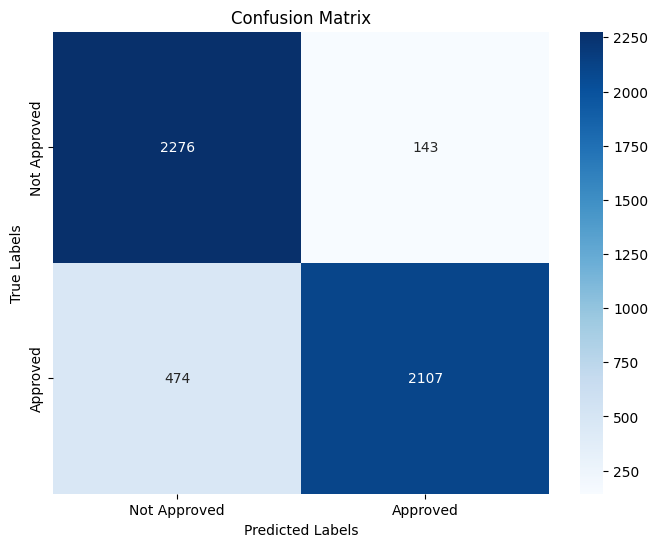

In [706]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Класс SVM

In [707]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y == 0, -1, 1)

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return (np.sign(approx) + 1) // 2


In [708]:
model = SVM(learning_rate=0.001, lambda_param=0.01, epochs=1000)
model.fit(X_train.values, y_train.values)

In [709]:
y_pred = model.predict(X_test.values)
report_combined = classification_report(y_test, y_pred)

In [710]:
print(report_combined)

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      2419
           1       0.81      0.96      0.88      2581

    accuracy                           0.86      5000
   macro avg       0.88      0.86      0.86      5000
weighted avg       0.88      0.86      0.86      5000



In [711]:
roc_auc_score(y_test, y_pred)

0.8604078617569579

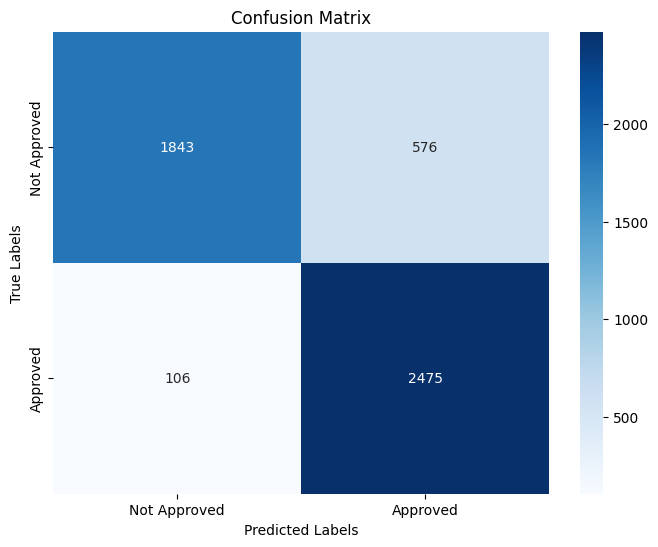

In [712]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Применяем готовые алгоритмы из библиотеки Scikit-learn

## Логистическая регрессия

In [713]:
for col in X_train.select_dtypes(include=['datetime64[ns]']).columns:
    X_train[col] = (X_train[col] - X_train[col].min()).dt.days
    X_test[col] = (X_test[col] - X_test[col].min()).dt.days

In [714]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [715]:
y_pred = model.predict(X_test)

In [716]:
report_combined = classification_report(y_test, y_pred)

In [717]:
print(report_combined)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2419
           1       0.92      0.91      0.92      2581

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



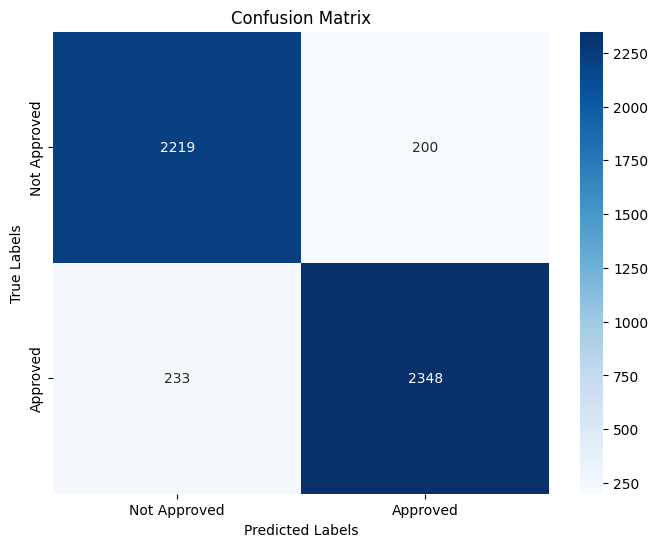

In [718]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##SVM

In [719]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [720]:
report_combined = classification_report(y_test, y_pred)

In [721]:
print(report_combined)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2419
           1       0.93      0.90      0.91      2581

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



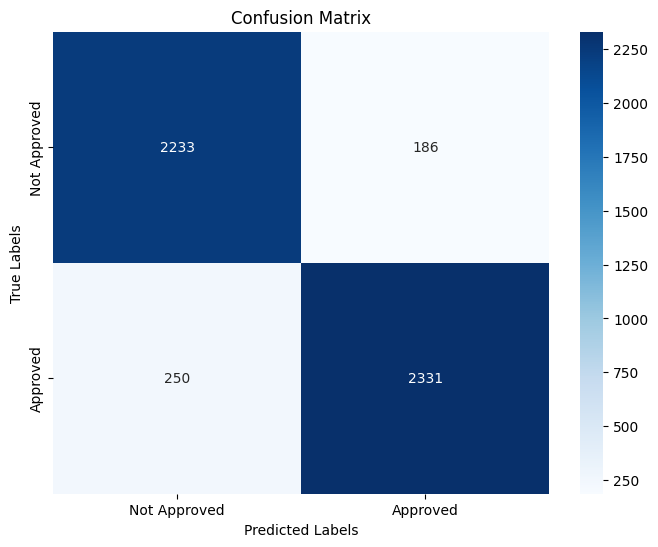

In [722]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##Решающее дерево

In [723]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [724]:
report_combined = classification_report(y_test, y_pred)
print(report_combined)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2419
           1       0.89      0.89      0.89      2581

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



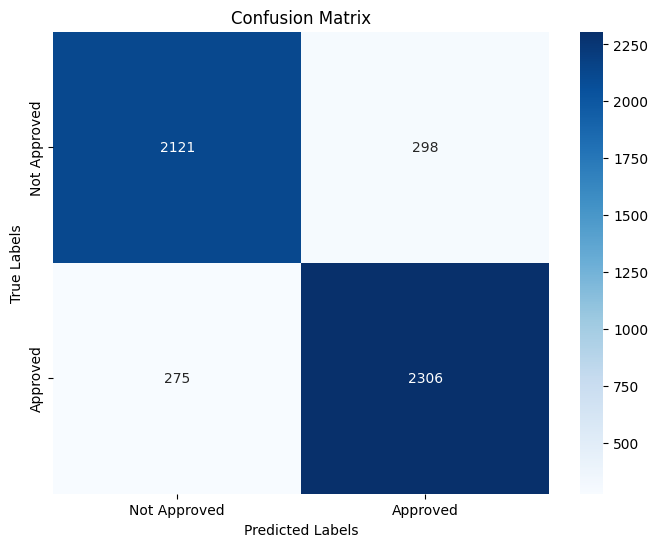

In [725]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##Рандомный лес

In [726]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [727]:
report_combined = classification_report(y_test, y_pred)
print(report_combined)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2419
           1       0.92      0.93      0.93      2581

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



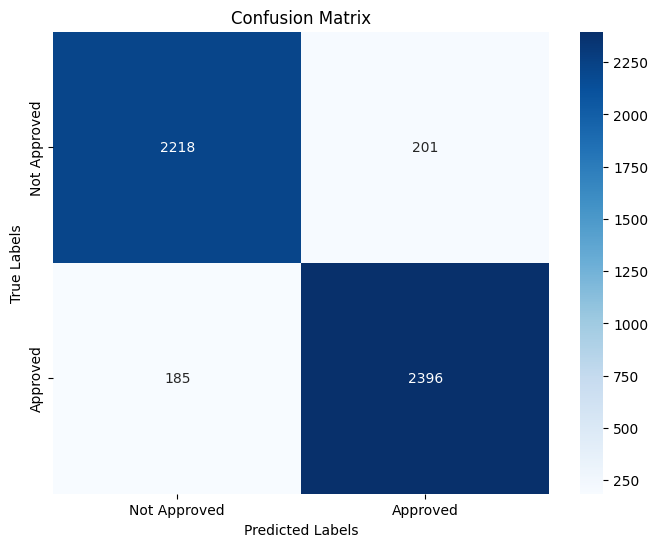

In [728]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Градиентный бустинг

In [729]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [730]:
report_combined = classification_report(y_test, y_pred)
print(report_combined)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2419
           1       0.93      0.93      0.93      2581

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000



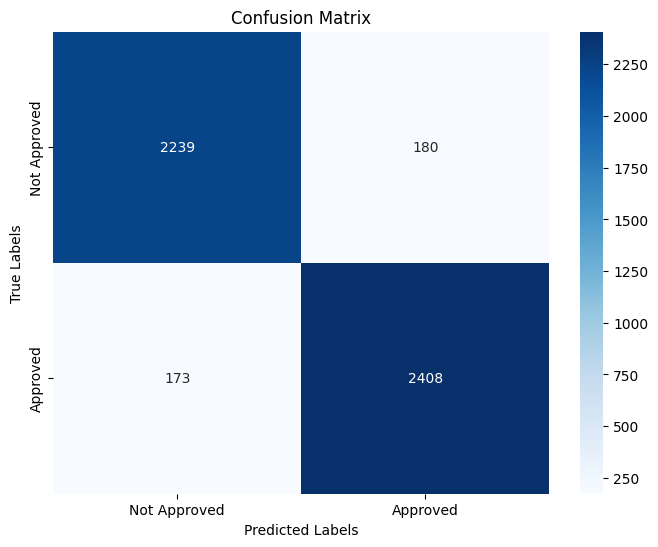

In [731]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Вывод:

В данной работе решалась задачу бинарной классификации при помощи различных методов машинного обучения.

Классы на тренировочной и тестовой выборке были почти равны, поэтому нам не нужно было их резать или применять другие методы борьбы с дисбалансом классов(добавлять веса классам).Сначала мы убрали строик, которые являются неинформативными(где NaN- >= 20 признакам). Далее мы заменили NaN на медианные значения и сделали OHE для категориальных признаков.

В задаче кредитного скоринга, на мой взгляд, метрика precision является самой
важной, потому лучше отказать хорошему клиенту, чем выдать кредит ненадежному заемщику.
Исследуя метрики, мы можем понять, что градиентный бустинг выдал лучший precision. Следовательно, нам лучше брать этот алгоритм машинного обучения, если мы хотим дальше это вводить в продакшн.